In [81]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import warnings
warnings.filterwarnings('ignore')
# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/X.npy
/kaggle/input/Y.npy


# Overwiev the Data Set

(-0.5, 63.5, 63.5, -0.5)

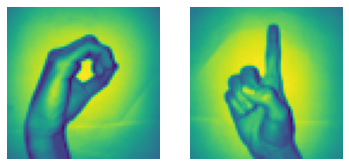

In [82]:
# Load data set
x_1=np.load('/kaggle/input/X.npy')
y_1=np.load('/kaggle/input/Y.npy')
img_size=64
plt.subplot(1,2,1)
plt.imshow(x_1[260].reshape(img_size,img_size))
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(x_1[900].reshape(img_size,img_size))
plt.axis('off')

In [83]:
# Join a seuence of arrays along an row ais
X=np.concatenate((x_1[204:409],x_1[822:1027]),axis=0) # from 0 to 204 is zero sign and from 205 to 410 is one sign
z=np.zeros(205)
o=np.ones(205)
Y=np.concatenate((z,o),axis=0).reshape(X.shape[0],1)
print("X shape:",X.shape)
print("Y Shape:",Y.shape)

X shape: (410, 64, 64)
Y Shape: (410, 1)


In [84]:
# Then lets create x_test,x_train,y_test and y_train arrays
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.15,random_state=42)
number_of_train=x_train.shape[0]
number_of_test=x_test.shape[0]


In [85]:
x_train_flatten=x_train.reshape(number_of_train,x_train.shape[1]*x_train.shape[2]) #convert to 2D
x_test_flatten=x_test.reshape(number_of_test,x_test.shape[1]*x_test.shape[2])      #convert to 2D
print("x train flatten",x_train_flatten.shape)
print("x test flatten",x_test_flatten.shape)

x train flatten (348, 4096)
x test flatten (62, 4096)


In [86]:
x_train=x_train_flatten.T  
x_test=x_test_flatten.T
y_train=y_train.T
y_test=y_test.T
print("x train:",x_train.shape)
print("x test:",x_test.shape)
print("y train:",y_train.shape)
print("y test:",y_test.shape)

x train: (4096, 348)
x test: (4096, 62)
y train: (1, 348)
y test: (1, 62)


What we did up to this point:
* Choose our labels(classes) that are sign zeros and sign one
* Create and flatten train and test sets
* Our final inputs(images) and outputs(labels or classes) created

# Logistic Regression

### Initializing Parameters

In [87]:
# so what we need is dimension 4096 that is number of pizels as a parameter for our initialize me thod(def)
def initialize_weights_and_bias(dimension):
    w=np.full((dimension,1),0.01)
    b=0.0
    return w,b
w,b = initialize_weights_and_bias(4096)
print(b)
print(w)

0.0
[[0.01]
 [0.01]
 [0.01]
 ...
 [0.01]
 [0.01]
 [0.01]]


### Forward Propagation

In [88]:
# calculation z
#z =np.dot(w.T,x_train)+b
def sigmoid(z):
    y_head=1/(1+np.exp(-z))
    return y_head


In [89]:
y_head=sigmoid(10)
print(y_head)

0.9999546021312976


In [90]:
# Forward propagation steps:
#find z=w.T*x+b
# y_head=sigmoid(z)
#loss(error)=loss(y,y_head)
#cost =sum(loss)
def forward_propagation(w,b,x_train,y_train):
    z=np.dot(w.T,x_train)+b
    y_head=sigmoid(z)   # probabilistic value 0-1
    loss=-y_train*np.log(y_head)-(1-y_train)/np.log(1-y_head)
    cost=(np.sum(loss))/x_train.shape[1]  #x_train.shape[1] is for scaling
    return cost

###  Backward Propagation

In [91]:
def backward_propagation(w,b,x_train,y_train):
    derivative_weight=(np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1]
    derivative_bias=np.sum(y_head-y_train)/x_train.shape[1]
    gradients={"derivative_weight":derivative_weight,"derivative_bias":derivative_bias}
    return gradients

* Up to this point we learn
 * Initializing parameters (implemented)
 * Finding cost with forward propagation and cost function(implemented)
 * Updating(learning) parameters (weights and bias). Now lets implement it.

### Updating(learning) parameters

In [92]:
def update (w,b,x_train,y_train,learning_rate,number_of_iteration):
    cost_list=[]
    cost_list2=[]
    index=[]
    # updating parameters is number_of_iteration
    for i in range(number_of_iteration):
        # make forward and backward propagation and find cost and gradients
        cost = forward_propagation(w,b,x_train,y_train)
        gradients=backward_propagation(w,b,x_train,y_train)
        cost_list.append(cost)
        # lets update
        w=w-learning_rate*gradients["derivative_weight"]
        b=b-learning_rate*gradients["derivative_bias"]
        if i % 10==0:
            cost_list2.append(cost)
            index.append(i)
            print("cost after iteraiton %i: %f" %(i,cost))
        # we update parameters weights and bias
    parameters={"weight":w,"bias":b}
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of Iteration")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients ,cost_list

### Prediction

In [93]:
def predict(w,b,x_test):
    # x_test is a input for forward propagation
    z=sigmoid(np.dot(w.T,x_test)+b)
    y_prediction=np.zeros((1,x_test.shape[1]))
    #if z is bigger than 0.5, our prediction is sign one(y_head=1),
    #if z is smalller than 0.5, our prediction is sign zero (y_head=0).
    for i in range (z.shape[1]):
        if z[0,i]<=0.5:
            y_prediction[0,i]=0
        else:
            y_prediction[0,i]=1
    return y_prediction
# predict(parameters["weight"],parameters["bias"],x_test)

cost after iteraiton 0: 0.017485
cost after iteraiton 10: 0.018116
cost after iteraiton 20: 0.018793
cost after iteraiton 30: 0.019523
cost after iteraiton 40: 0.020311


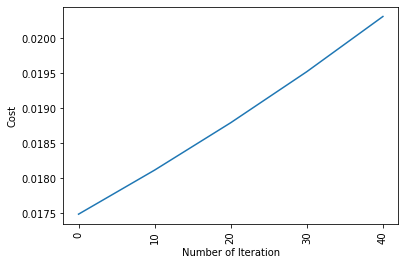

train accuracy:50.57471264367816 % 
test accuracy:46.7741935483871 % 


In [94]:
def logistig_regression (x_train,y_train,x_test,y_test, learning_rate,num_iterations):
    #initialize
    dimension=x_train.shape[0] # that is 4096
    w,b=initialize_weights_and_bias(dimension)
    # do not change learning rate
    parameters,gradients,cost_list=update(w,b,x_train,y_train,learning_rate,num_iterations)
    
    y_prediction_test=predict(parameters["weight"],parameters["bias"],x_test)
    y_prediction_train=predict(parameters["weight"],parameters["bias"],x_train)
    
    # Print train/test Errors

    print("train accuracy:{} % ".format(100-np.mean(np.abs(y_prediction_train-y_train))*100))
    print("test accuracy:{} % ".format(100-np.mean(np.abs(y_prediction_test-y_test))*100))
    
logistig_regression(x_train,y_train,x_test,y_test,learning_rate=0.0001,num_iterations=50)

    

### Logistic Regression with Sklearn

In [95]:
from sklearn import linear_model
logreg=linear_model.LogisticRegression(random_state=42,max_iter=50)
print("test accuracy:{}".format(logreg.fit(x_train.T,y_train.T).score(x_test.T,y_test.T)))
print("train accuracy:{}".format(logreg.fit(x_train.T,y_train.T).score(x_train.T,y_train.T)))

test accuracy:0.967741935483871
train accuracy:1.0


# Artificial Neural Network**

###  2-Layer Neural Network

In [104]:
#Initialize parameters and layer size
def initialize_parameters_and_layer_size_NN(x_train,y_train):
    parameters ={"weight1":np.random.randn(3,x_train.shape[0])*0.1,
                 "bias1":np.zeros((3,1)),
                 "weight2":np.random.randn(y_train.shape[0],3)*0.1,
                 "bias2":np.zeros((y_train.shape[0],1)),
        
    }
    return parameters

### Forward Propagation

In [105]:
def forward_propagation_NN(x_train,parameters):
    z1=np.dot(parameters["weight1"],x_train)+parameters["bias1"]
    a1=np.tanh(z1)
    z2=np.dot(parameters["weight2"],a1)+parameters["bias2"]
    a2=sigmoid(z2)  # a2 mean y_head is probabilistic value
    cache={"z1":z1,
          "a1":a1,
          "z2":z2,
          "a2":a2}
    return a2, cache

### Loss and Cost fuction

In [106]:
# Compute cost
def compute_cost_NN(a2,y,parameters):
    logprobs=np.multiply(np.log(a2),Y)
    cost=-np.sum(logprobs)/y.shape[1]
    return cost

###  Backward Propagation

In [107]:
def backward_propagation_NN(parameters,cache,x,y):
    dz2=cache["a2"]-y
    dw2=np.dot(dz2,cache["a1"].T)/x.shape[1]
    db2=np.sum(dz2,axis=1,keepdims=True)/x.shape[1]
    dz1=np.dot(parameters["weight2"].T,dz2)*(1-np.power(cache["a1"],2))
    dw1=np.dot(dz1,x.T)/x.shape[1]
    db1=np.sum(dz1,axis=1,keepdims=True)/x.shape[1]
    grads={"dweight1":dw1,
           "dbias1":db1,
           "dweight2":dw2,
           "dbias2":db2}
    return grads 
    
    
    
    
    
    
    
    
    

### Update Parameters

In [108]:
def update_parameters_NN(parameters,grads,learning_rate=0.01):
    parameters = {"weight1":parameters["weight1"]-learning_rate*grads["dweight2"],
                 "bias1":parameters["bias1"]-learning_rate*grads["dbias1"],
                 "weight2":parameters["weight2"]-learning_rate*grads["dweight2"],
                 "bias2":parameters["bias2"]-learning_rate*grads["dbias2"]}
    return parameters

### Prediction with learn parameters weight and bias

In [110]:
# prediction
def predict_NN(parameters,x_test):
    # x_test is a input for forward propagation
    a2, cache=forward_propagation_NN(x_test,parameters)
    y_prediction=np.zeros((1,x_test.shape[1]))
    #if z is bigger than 0,5 our prediction is sign one (y_head=1)
    # if z is smaller than 0.5 our prediction is sign zero(y_head=0)
    for i in range(a2.shape[1]):
        if a2[0,i]<=0.5:
            y_prediction[0,i]=0
        else:
            y_prediction[0,i]=1
    return y_prediction

### Create ANN Model

In [112]:
# 2 - Layer neurak network
def two_layer_neural_network(x_train,y_train,x_test,y_test,num_iterations):
    cost_list=[]
    index_list=[]
    # intialize paremeters and layer sizes
    parameters=initialize_parameters_and_layer_size_NN(x_train,y_train)
    for i in range(0,num_iterations):
        # forward propagation
        a2, cache = forward_propagation_NN(x_train,parameters)
        # compute cost
        cost=compute_cost_NN(a2,y_train,parameters)
        #backward propagation
        grads=backward_propagation_NN(parameters,cache,x_train,y_train)
        #update parameters
        parameters=update_parameters_NN(parameters,grads)
        if i % 100==0:
            cost_list.append(cost)
            index_list.append(i)
            print("cost after iteration %i: %f" %(i,cost))
    plt.plot(index_list,cost_list)
    plt.xticks(index_list,rotation='vertical')
    plt.xlabel("Number of iteration")
    plt.ylabel("cost")
    plt.show()
    # predict
    y_prediction_test=predict_NN(parameters,x_test)
    y_prediction_train=predict_NN(parameters,x_train)
    # print test/train errors
    print("train accuracy: {} %".format(100-np.mean(np.abs(y_prediction_train-y_train))*100))
    print("test accuracy: {} %".format(100-np.mean(np.abs(y_prediction_test-y_test))*100))
    return parameters
paramaters=two_layer_neural_network(x_train,y_train,x_test,y_test,num_iterations=50)

ValueError: operands could not be broadcast together with shapes (3,348) (1,3) 

### L-Layer Neural Network

In [114]:
#reshaping 
x_train,x_test,y_train,y_test=x_train.T,x_test.T,y_train.T,y_test.T

### Implementing with keras library

In [119]:
# Evaluating the ANN
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential # intialize neural network library
from keras.layers import Dense # build our layers library
def build_classifier():
    classifier=Sequential() # initialize neural network
    classifier.add(Dense(units=8,kernel_initializer='uniform',activation='relu',input_dim=x_train.shape[1]))
    classifier.add(Dense(units=4,kernel_initializer='uniform',activation='relu'))
    classifier.add(Dense(units=1,kernel_initializer='uniform',activation='sigmoid'))
    classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
    return classifier
classifier=KerasClassifier(build_fn=build_classifier,epochs=100)
accuracies=cross_val_score(estimator=classifier,X=x_train,y=y_train,cv=3)
mean=accuracies.mean()
variance=accuracies.std()
print("accuracy mean:"+ str(mean))
print("accuracy variance:"+ str(variance))
   

ValueError: Found input variables with inconsistent numbers of samples: [4096, 1]